In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


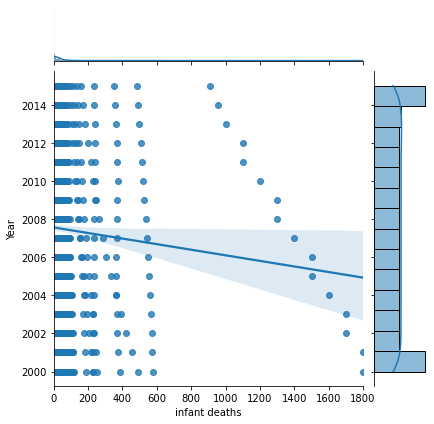

In [12]:
sns.jointplot(x='infant deaths', y='Year', 
              data=df, kind='reg')

In [15]:
t_countries_df = df.groupby('Country')[['Adult Mortality']].sum()\
    .sort_values('Adult Mortality', ascending=False).head(20)
t_countries_df.style.bar()

,Adult Mortality
Country,
Lesotho,8801.000000
Zimbabwe,7398.000000
Botswana,7170.000000
Malawi,6791.000000
Côte d'Ivoire,6677.000000
South Africa,6604.000000
Sierra Leone,5725.000000
Zambia,5669.000000
Kenya,5577.000000


Наибольшая смертность среди взрослого населения заметна в государстве Лесото, Южная Африка

<AxesSubplot:ylabel='Status'>

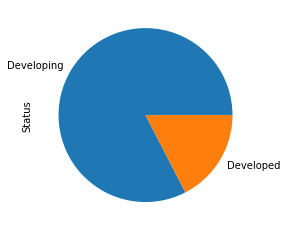

In [16]:
name_dynamics = df['Status'].value_counts()
name_dynamics.plot(kind='pie', y='Count')

<AxesSubplot:xlabel='Adult Mortality', ylabel='Country'>

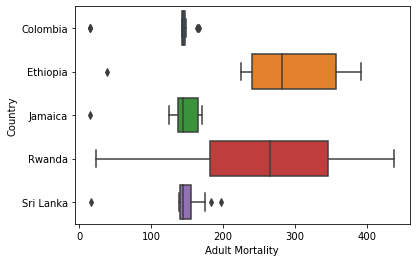

In [23]:
t_country = df.Country.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Country", x="Adult Mortality", 
        data=df[df.Country.isin(t_country)], orient="h")

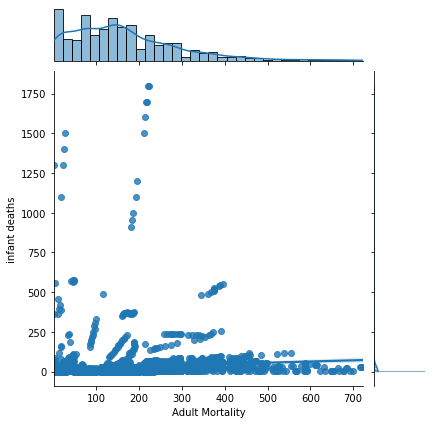

In [24]:
sns.jointplot(x='Adult Mortality', y='infant deaths', 
              data=df, kind='reg')

In [5]:
status_hep = df.pivot_table(
                            index='Country', 
                            columns='Status', 
                            values='infant deaths', 
                            aggfunc=sum).fillna(0).applymap(float)

status_hep

Status,Developed,Developing
Country,,
Afghanistan,0.0,1252.0
Albania,0.0,11.0
Algeria,0.0,325.0
Angola,0.0,1340.0
Antigua and Barbuda,0.0,0.0
...,...,...
Venezuela (Bolivarian Republic of),0.0,150.0
Viet Nam,0.0,467.0
Yemen,0.0,630.0


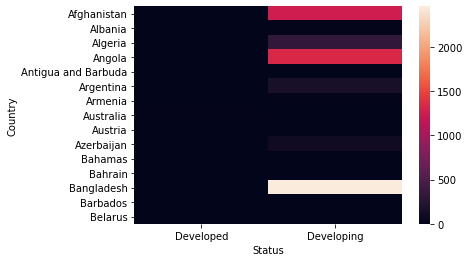

In [7]:
ax = sns.heatmap(status_hep.head(15))

In [18]:
data= df.groupby('Country')[['infant deaths', 'Polio', 'Population']].sum()\
     .sort_values('Population', ascending=False)

In [19]:
data.head()

,infant deaths,Polio,Population
Country,,,
India,21867,1114.0,6.743483e+09
Indonesia,2419,995.0,1.864884e+09
Brazil,1092,1573.0,1.410049e+09
Nigeria,8571,661.0,1.134032e+09
Pakistan,5887,1027.0,1.104447e+09


array([[<AxesSubplot:xlabel='infant deaths', ylabel='infant deaths'>,
        <AxesSubplot:xlabel='Polio', ylabel='infant deaths'>,
        <AxesSubplot:xlabel='Population', ylabel='infant deaths'>],
       [<AxesSubplot:xlabel='infant deaths', ylabel='Polio'>,
        <AxesSubplot:xlabel='Polio', ylabel='Polio'>,
        <AxesSubplot:xlabel='Population', ylabel='Polio'>],
       [<AxesSubplot:xlabel='infant deaths', ylabel='Population'>,
        <AxesSubplot:xlabel='Polio', ylabel='Population'>,
        <AxesSubplot:xlabel='Population', ylabel='Population'>]],
      dtype=object)

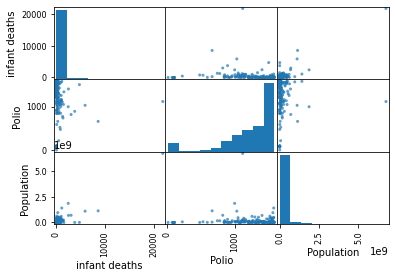

In [20]:
pd.plotting.scatter_matrix(data, alpha=0.7)

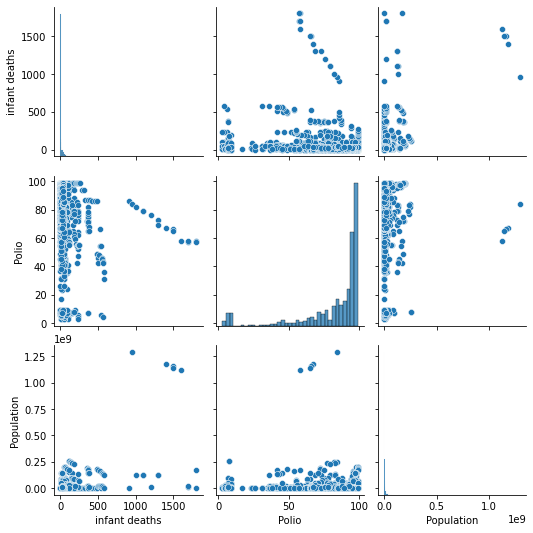

In [21]:
sns_plot = sns.pairplot(
    df[['infant deaths', 'Polio', 'Population']])
sns_plot

Уровень детской смертности не зависит от иммунизации от полиомиелита и не оказывает сильного влияния на количество населения. 